### Qu'est ce que le clustering ?

Le clustering est une méthode d’apprentissage non supervisé (unsupervised learning). Ainsi, on n’essaie pas d’apprendre une relation de corrélation entre un ensemble de features X d’une observation et une valeur à prédire Y, comme c’est le cas pour l’apprentissage supervisé. L’apprentissage non supervisé va plutôt trouver des patterns dans les données. Notamment, en regroupant les choses qui se ressemblent.

La mise en cluster consiste à séparer ou à diviser un ensemble de données en un certain nombre de groupes, de sorte que les ensembles de données appartenant aux mêmes groupes se ressemblent davantage que ceux d’autres groupes. En termes simples, l’objectif est de séparer les groupes ayant des traits similaires et de les assigner en grappes.

Il existe deux types de clustering :

* Algorithmes de Partitionnement: Construire plusieurs partitions puis les évaluer selon certains critères
* Algorithmes hiérarchiques: Créer une décomposition hiérarchique des objets selon certains critères
* Algorithmes basés sur la densité: basés sur des notions de connectivité et de densité
* Algorithmes de grille: basés sur un structure à multiniveaux de granularité
* Algorithmes à modèles: Un modèle est supposé pour chaque cluster. Puis vérifier chaque modèle sur chaque groupe pour choisir le meilleur


### Est ce un problème difficile ?

* Ils sont coûteux en calcul par rapport à la complexité des algorithmes
* Ils sont sensibles au bruit et aux valeurs aberrantes 

### Quelle sont les métrique utilisé pour le clustering ?

* Normalized Mutual Information (NMI)
* Adjusted Mutual Information (AMI)
* Index de Davies-Bouldin 
* silouhette
* scores de Fowlkes-Mallows
* Index Calinski-Harabasz
* Homogénéité, exhaustivité et mesure en V
*

### séparer les métrique avec "ground truth" et "sans "ground truth" ?
#### ground truth

* AMI
* NMI 
* Homogénéité

#### whithout ground truth

* Silouhette
* Index Calinski-Harabasz
* Index de Davies-Bouldin 


### Data set digits

In [ ]:
#import library
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Import some data
digits = load_digits()

# Show dimensionality
print(digits.data.shape)

(1797, 64)


### Use kmeans whitout standardScaler

In [ ]:
kmeans = KMeans(
   init="random",
   n_clusters=10,
   n_init=10,
   max_iter=300,
   random_state=42
)

In [ ]:
kmeans.fit(digits.data)

KMeans(init='random', n_clusters=10, random_state=42)

In [ ]:
kmeans.cluster_centers_[:1]

array([[ 0.00000000e+00,  1.12612613e-01,  4.00900901e+00,
         1.18963964e+01,  1.22882883e+01,  5.30630631e+00,
         4.23423423e-01,  1.38777878e-16,  9.00900901e-03,
         8.64864865e-01,  8.21171171e+00,  1.35765766e+01,
         1.26126126e+01,  9.86036036e+00,  1.50900901e+00,
        -8.32667268e-17,  8.67361738e-19,  1.18468468e+00,
         8.31981982e+00,  1.19684685e+01,  1.24099099e+01,
         9.45045045e+00,  1.01351351e+00,  4.85722573e-17,
         6.50521303e-19,  9.23423423e-01,  7.19369369e+00,
         1.41171171e+01,  1.42117117e+01,  4.91441441e+00,
         2.02702703e-01,  1.30104261e-18,  0.00000000e+00,
         7.74774775e-01,  8.03603604e+00,  1.48108108e+01,
         1.29144144e+01,  2.18468468e+00,  1.80180180e-02,
         0.00000000e+00,  5.20417043e-18,  1.23423423e+00,
         1.05000000e+01,  1.20675676e+01,  1.21351351e+01,
         4.04054054e+00,  2.02702703e-01,  1.73472348e-17,
         1.35135135e-02,  8.46846847e-01,  9.53603604e+0

In [ ]:
kmeans.n_iter_

25

In [ ]:
kmeans.labels_[:5]

array([6, 0, 0, 1, 2], dtype=int32)

### Result score

In [ ]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

print(110* '_')
print('Result\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\taccracy\tsilhouette\tprecision')
y_pred = kmeans.labels_
y_true = digits.target
t0 = time()
estimator = make_pipeline(kmeans).fit(digits.data)
fit_time = time() - t0
results = ["Score", fit_time, estimator[-1].inertia_]
# Define the metrics which require only the true labels and estimator
# labels
clustering_metrics = [
    metrics.homogeneity_score,
    metrics.completeness_score,
    metrics.v_measure_score,
    metrics.adjusted_rand_score,
    metrics.adjusted_mutual_info_score,
    metrics.accuracy_score,

    
]
results += [m(y_true, estimator[-1].labels_) for m in clustering_metrics]
# The silhouette score requires the full dataset
results += [
    metrics.silhouette_score(digits.data, estimator[-1].labels_,
                             metric="euclidean", sample_size=300,),
    metrics.precision_score(y_true, y_pred, average = 'micro')
]

    

# Show the results
formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}"
                    "\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t\t{:.3f}")


print(formatter_result.format(*results))
print(110* '_')

______________________________________________________________________________________________________________
Result		time	inertia	homo	compl	v-meas	ARI	AMI	accracy	silhouette	precision
Score    	1.057s	1165201	0.737	0.745	0.741	0.664	0.738	0.088	0.175		0.088
______________________________________________________________________________________________________________


On remarque qu'on as une precision et l'accuracy avec un score très faible une des solutions est d'essayer avec le standardScaler et voir si les résultats sont meilleur ou pas 

### User standardScaler

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(digits.data)

### Use Kmeans

In [ ]:
kmeans = KMeans(
   init="random",
   n_clusters=10,
   n_init=10,
   max_iter=300,
   random_state=42
)

In [ ]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=10, random_state=42)

In [ ]:
kmeans.cluster_centers_[:1]

array([[ 0.        , -0.18635008,  0.00655712,  0.3653313 ,  0.5898762 ,
         0.87255063,  0.80685553,  0.10790967, -0.05907756, -0.27588243,
         0.10671144, -0.1799011 ,  0.04849708,  0.73315301,  0.72915704,
        -0.08292031, -0.04462507, -0.40866675, -0.8796158 , -0.86550853,
         0.06057151,  0.66327528,  0.21830983, -0.10140932, -0.03337973,
        -0.5118553 , -0.75076038, -0.3345241 ,  0.50145435,  0.7854724 ,
         0.68511538, -0.04723238,  0.        , -0.24772249,  0.21433882,
         0.73442323,  0.79206232,  0.33269838,  0.34655961,  0.        ,
        -0.06134367, -0.16378641, -0.24058259,  0.70699289,  0.51741772,
        -0.80422354, -0.65943648, -0.08874162, -0.03543326, -0.35851961,
        -0.780771  ,  0.56122513, -0.68690091, -1.39018412, -0.75629349,
        -0.20978513, -0.02359646, -0.19081682,  0.20454911, -0.02421214,
        -1.96928015, -1.12283835, -0.5056698 , -0.19600752]])

In [ ]:
kmeans.inertia_

69671.80496339034

In [ ]:
kmeans.labels_[:5]

array([7, 8, 8, 6, 4], dtype=int32)

In [ ]:
kmeans.cluster_centers_[:1]

array([[ 0.        , -0.18635008,  0.00655712,  0.3653313 ,  0.5898762 ,
         0.87255063,  0.80685553,  0.10790967, -0.05907756, -0.27588243,
         0.10671144, -0.1799011 ,  0.04849708,  0.73315301,  0.72915704,
        -0.08292031, -0.04462507, -0.40866675, -0.8796158 , -0.86550853,
         0.06057151,  0.66327528,  0.21830983, -0.10140932, -0.03337973,
        -0.5118553 , -0.75076038, -0.3345241 ,  0.50145435,  0.7854724 ,
         0.68511538, -0.04723238,  0.        , -0.24772249,  0.21433882,
         0.73442323,  0.79206232,  0.33269838,  0.34655961,  0.        ,
        -0.06134367, -0.16378641, -0.24058259,  0.70699289,  0.51741772,
        -0.80422354, -0.65943648, -0.08874162, -0.03543326, -0.35851961,
        -0.780771  ,  0.56122513, -0.68690091, -1.39018412, -0.75629349,
        -0.20978513, -0.02359646, -0.19081682,  0.20454911, -0.02421214,
        -1.96928015, -1.12283835, -0.5056698 , -0.19600752]])

In [ ]:
kmeans.n_iter_

28

In [ ]:
kmeans.labels_[:5]

array([7, 8, 8, 6, 4], dtype=int32)

In [ ]:
kmeans.labels_.shape

(1797,)

In [ ]:

print(110* '_')
print('Result\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\taccracy\tsilhouette\tprecision')
y_pred = kmeans.labels_
y_true = digits.target
t0 = time()
estimator = make_pipeline(StandardScaler(), kmeans).fit(digits.data)
fit_time = time() - t0
results = ["Score", fit_time, estimator[-1].inertia_]
# Define the metrics which require only the true labels and estimator
# labels
clustering_metrics = [
    metrics.homogeneity_score,
    metrics.completeness_score,
    metrics.v_measure_score,
    metrics.adjusted_rand_score,
    metrics.adjusted_mutual_info_score,
    metrics.accuracy_score,

    
]
results += [m(y_true, estimator[-1].labels_) for m in clustering_metrics]
# The silhouette score requires the full dataset
results += [
    metrics.silhouette_score(digits.data, estimator[-1].labels_,
                             metric="euclidean", sample_size=300,),
    metrics.precision_score(y_true, y_pred, average = 'micro')
]

    

# Show the results
formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}"
                    "\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t\t{:.3f}")

print(formatter_result.format(*results))
print(110* '_')

______________________________________________________________________________________________________________
Result		time	inertia	homo	compl	v-meas	ARI	AMI	accracy	silhouette	precision
Score    	1.939s	47651	0.820	0.602	0.694	0.490	0.686	0.009	0.116		0.009
______________________________________________________________________________________________________________


In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}


# A list holds the SSE values for each k
sse = []
for k in range(1, 11 ):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

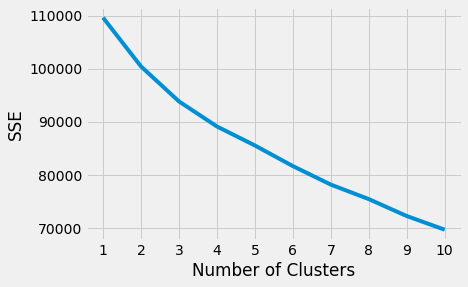

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

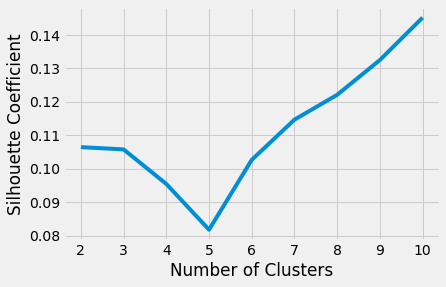

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

On remarque que quand on augmente le nombre clusters le coefficent silhouette dimnue a partir de 17 ème clusteur

In [ ]:
a = 30
b = 3
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}


# A list holds the SSE values for each k
sse = []
for k in range(1, a, b):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

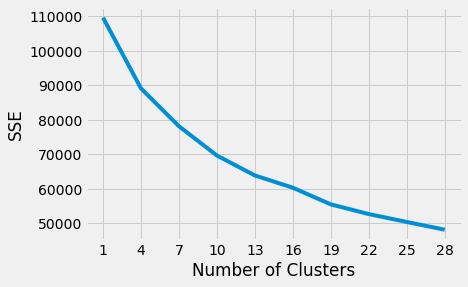

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, a, b), sse)
plt.xticks(range(1, a, b))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, a, b):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

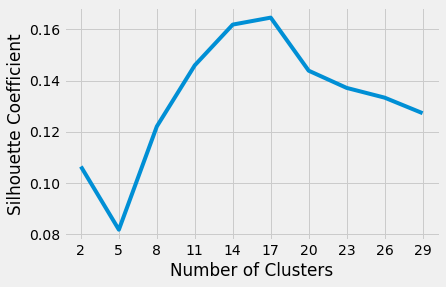

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, a, b) ,silhouette_coefficients)
plt.xticks(range(2, a, b))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

### Visualize the results on PCA-reduced data

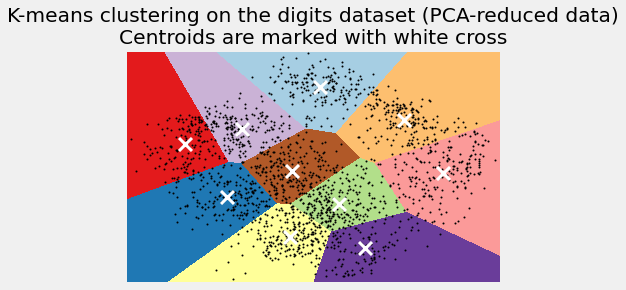

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

reduced_data = PCA(n_components=2).fit_transform(digits.data)
kmeans = KMeans(init="k-means++", n_clusters=10, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


### Load data set Emotion_final

In [18]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from time import time
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [19]:
df = pd.read_csv("data/Emotion_final.csv")

In [20]:
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


### Processing data

In [21]:
corpus = df.Text
targets = df.Emotion

#stop_words = nltk.corpus.stopwords.words("english")

In [22]:
vectorizer = CountVectorizer()

In [23]:
data = vectorizer.fit_transform(corpus)

In [24]:
le = preprocessing.LabelEncoder()
le.fit(targets)
labels = le.transform(targets)

In [25]:
data.shape

(21459, 19211)

In [26]:
labels.shape

(21459,)

In [27]:
def bench_k_means(kmeans, name, data, labels, with_mean=False):
    """Benchmark to evaluate the KMeans initialization methods."""


    t0 = time()
    estimator = make_pipeline(StandardScaler(with_mean=False), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
        metrics.accuracy_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(data, estimator[-1].labels_,
                                 metric="euclidean")
    ]

    # Show the results
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

In [28]:
print(82 * '_')
print('init\t\ttime\tinertia\t\thomo\tcompl\tv-meas\tARI\tAMI\taccracy\tsilhouette')
n_digits = 6
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4,
                random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)



clf = TruncatedSVD(n_components = 6)
clf.fit(data)


kmeans = KMeans(n_clusters=n_digits, init = clf.components_, n_init =1)
bench_k_means(kmeans=kmeans, name="PCA-init", data=data, labels=labels)


clf = TruncatedSVD(n_components = 100)
Xpca = clf.fit_transform(data)


kmeans = KMeans(n_clusters=n_digits)
bench_k_means(kmeans=kmeans, name="PCA-based", data=Xpca, labels=labels)

print(82 * '_')

__________________________________________________________________________________
init		time	inertia		homo	compl	v-meas	ARI	AMI	accracy	silhouette
k-means++	4.540s	411698579	0.000	0.064	0.001	0.000	0.000	0.139	-0.024
random   	9.565s	411963612	0.000	0.073	0.001	-0.000	0.000	0.124	-0.080
PCA-init 	7.696s	411909008	0.002	0.005	0.003	0.005	0.003	0.248	-0.010
PCA-based	2.477s	2055153	0.003	0.007	0.004	0.007	0.004	0.301	0.060
__________________________________________________________________________________


In [ ]:
from sklearn.cluster import SpectralClustering
n_digits = 6

clf = TruncatedSVD(n_components = 50)
Xpca = clf.fit_transform(data)


kmeans = SpectralClustering(n_clusters=n_digits)
bench_k_means(kmeans=kmeans, name="PCA-based", data=Xpca, labels=labels)

Pour le spectralClustering il faut beaucoup de mémoire 